<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_Datos_UGR_24/blob/main/Copia_de_Semana_08_Practica_08_Resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 008

Git.

# Ejercicio 01

Crear un repositorio en github llamado `semana_08_practica`. Al crear el repositorio crearlo con el archivo `README.md` y el archivo `.gitignore` debe ser para los proyecto `python`.

Luego realizar el clone del repositorio.

`IMPORTANTE: recuerden crear el token de acceso.`

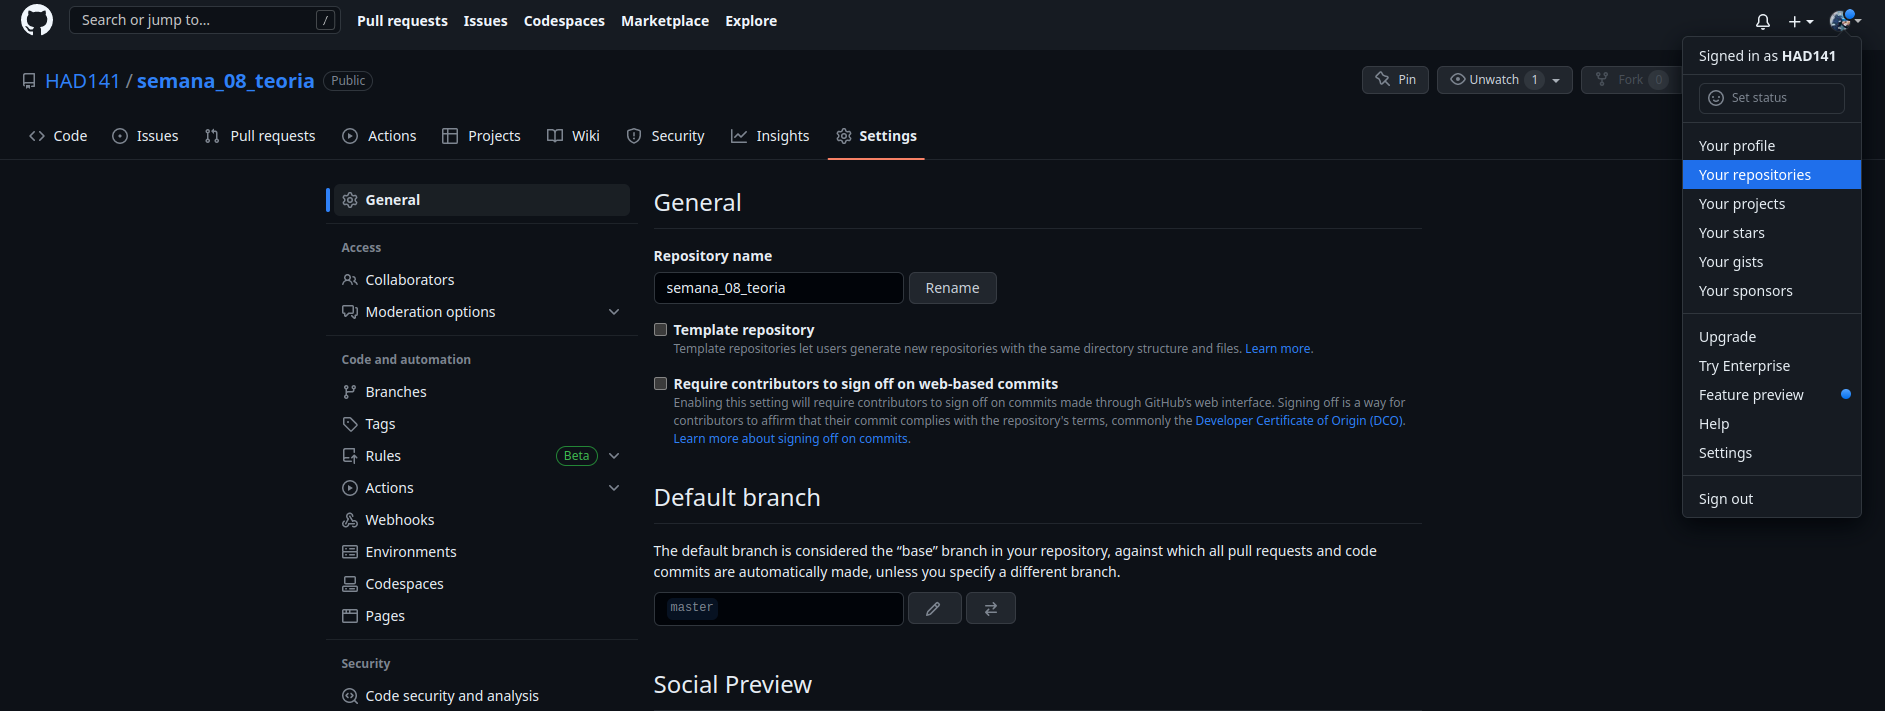

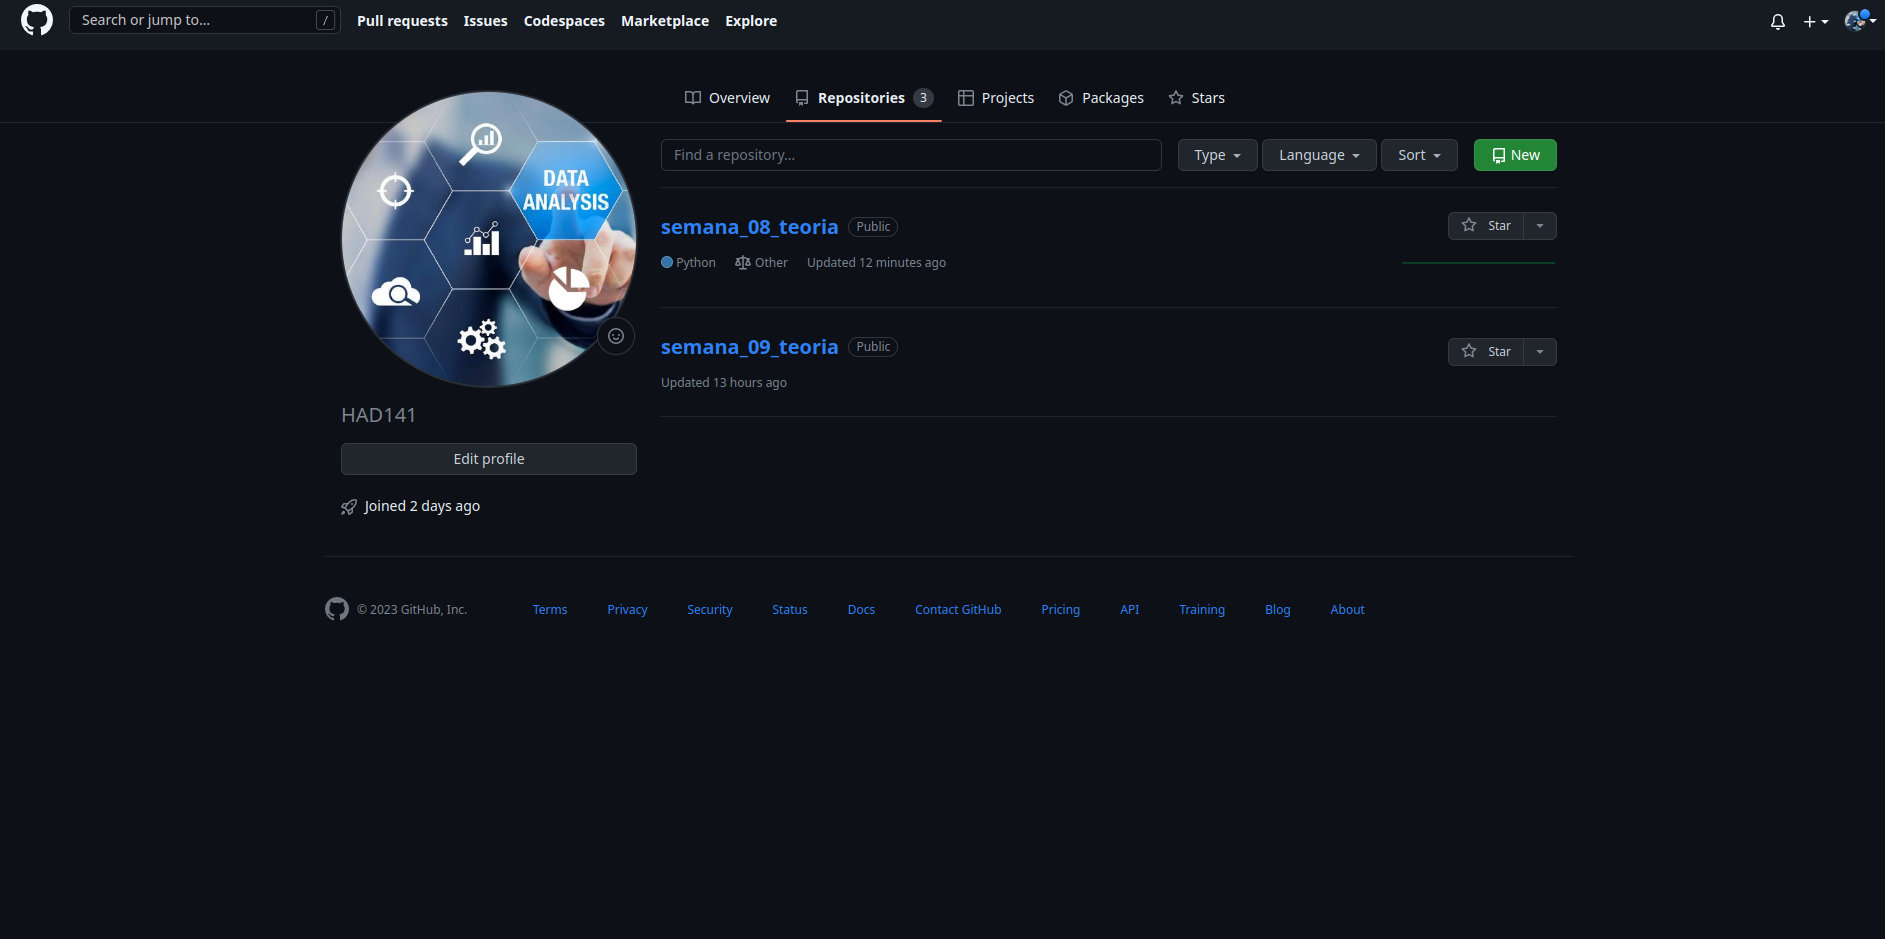

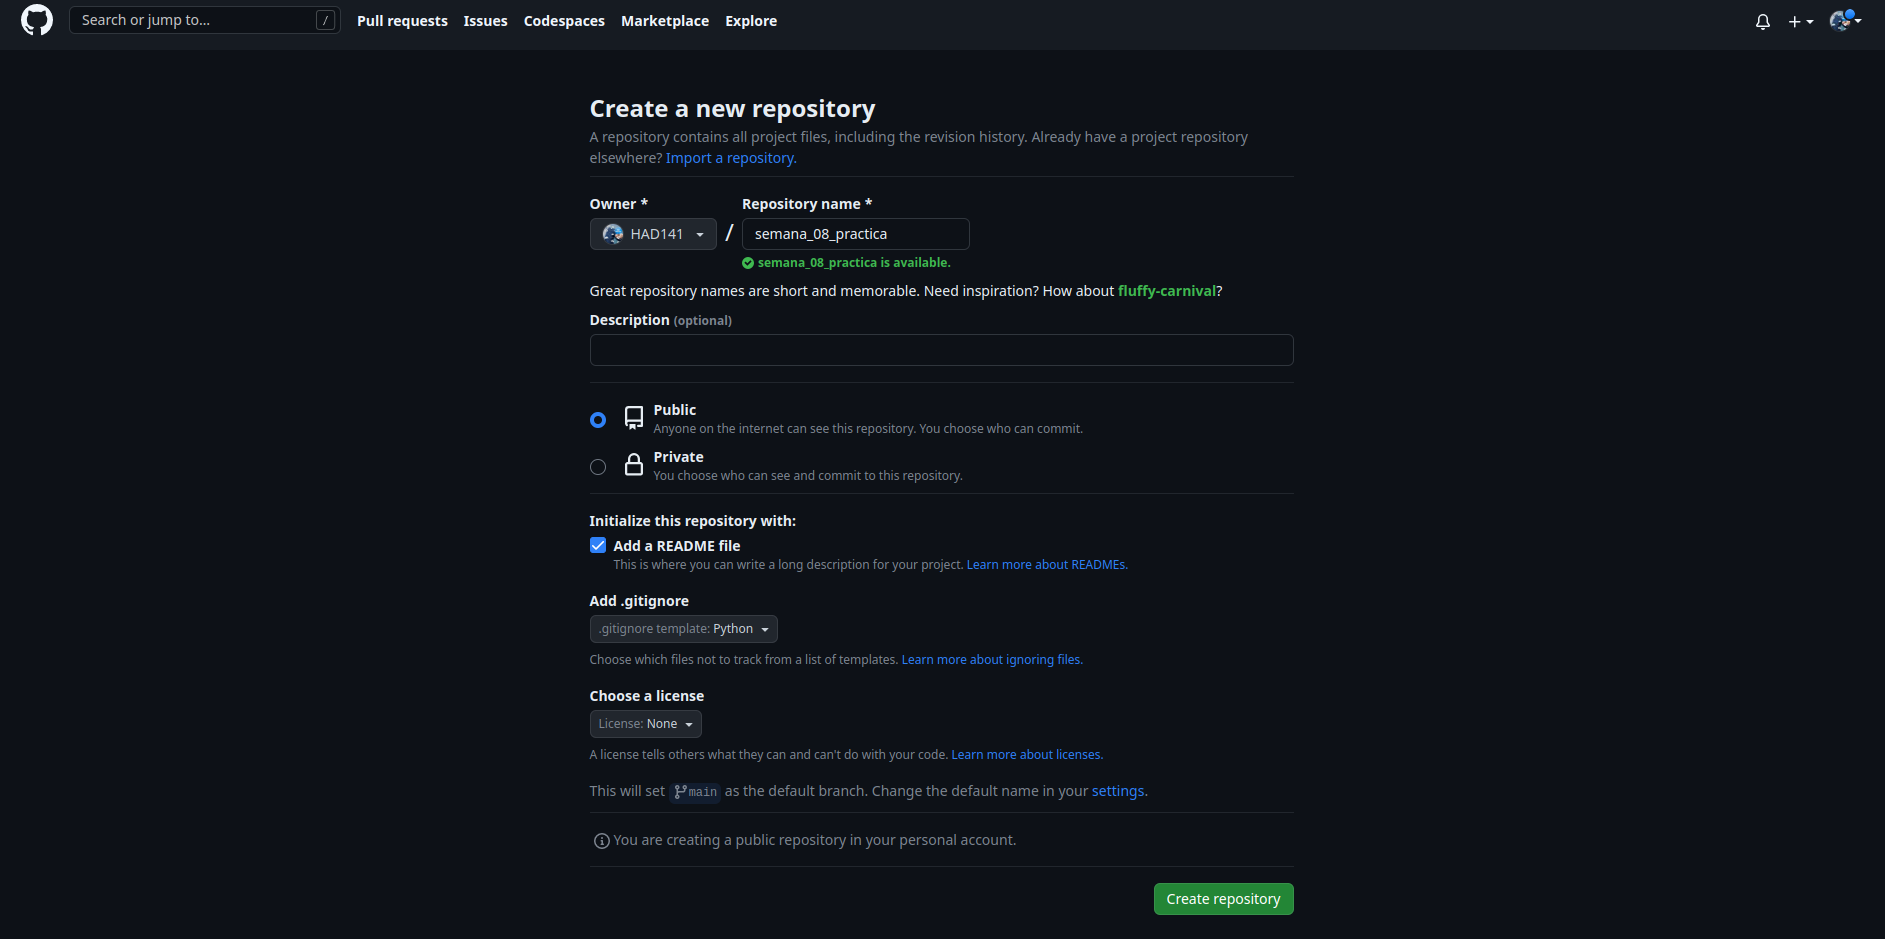

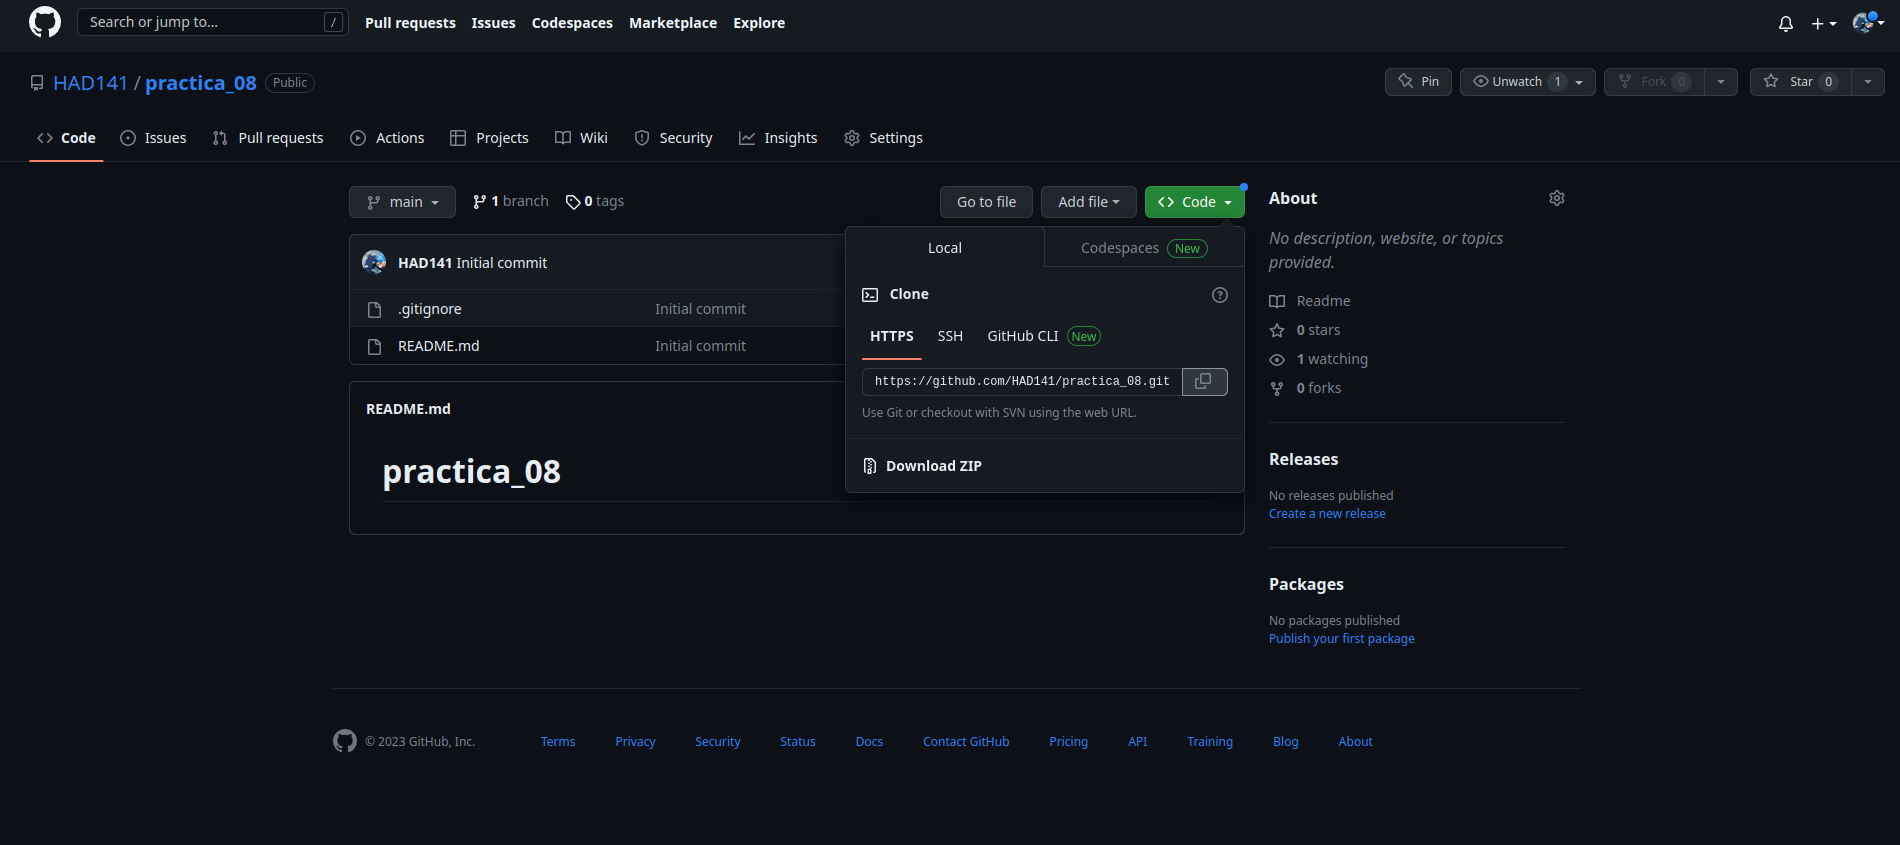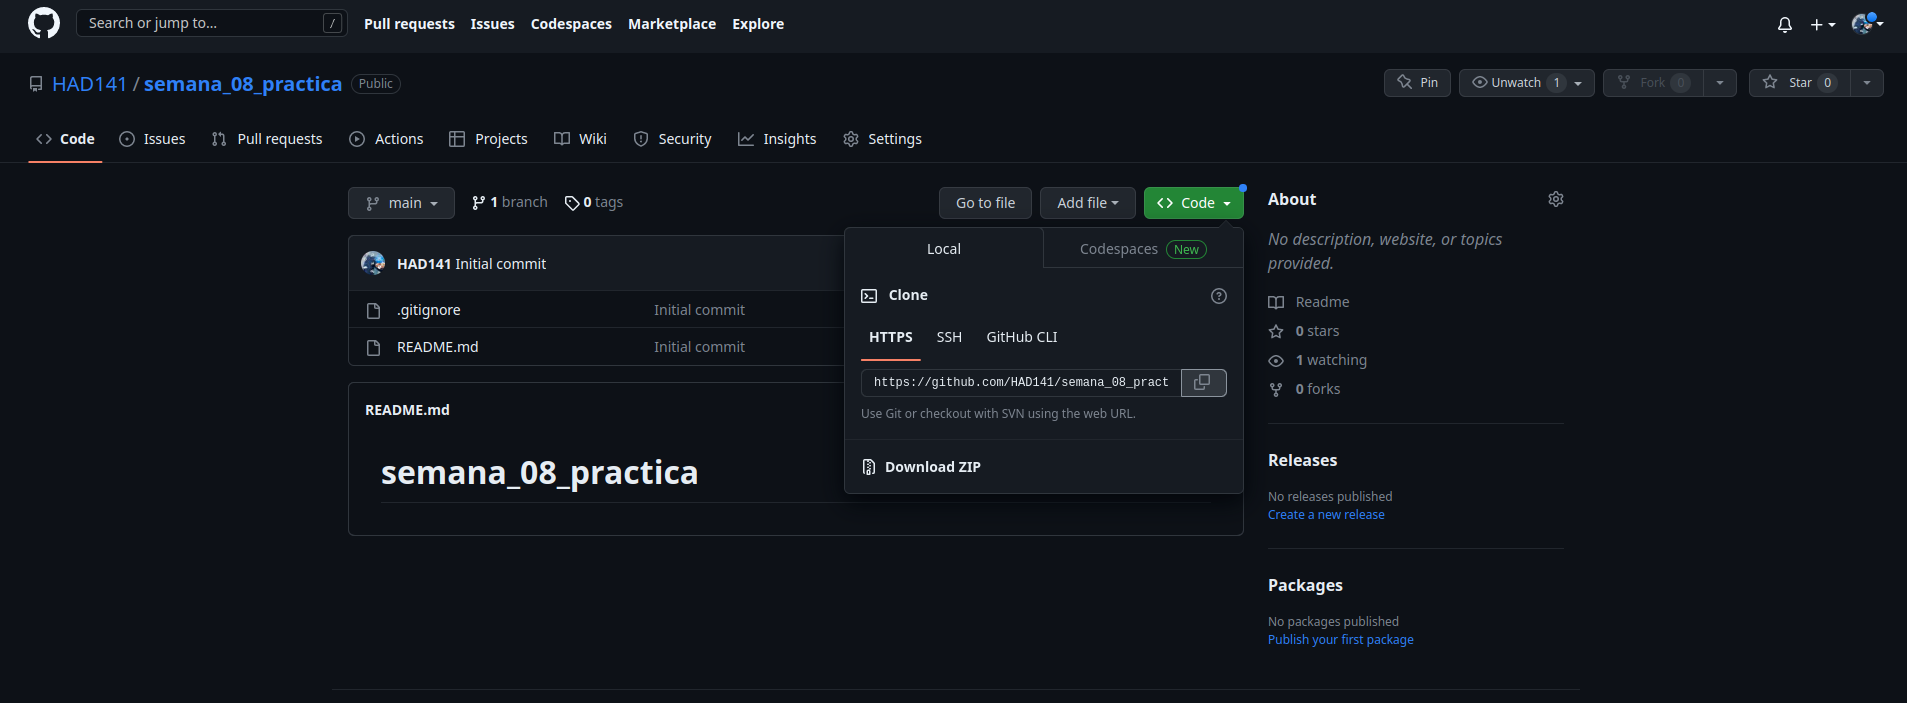

In [ ]:
# clono el repositorio
TOKEN_GIT="YOUR_TOKEN"

!git clone https://{TOKEN_GIT}@github.com/HAD141/semana_08_practica.git

Cloning into 'semana_08_practica'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 2.07 KiB | 353.00 KiB/s, done.


In [ ]:
# mostramos los archivos
!ls -al

total 20
drwxr-xr-x 1 root root 4096 May  3 22:39 .
drwxr-xr-x 1 root root 4096 May  3 22:38 ..
drwxr-xr-x 4 root root 4096 May  2 13:36 .config
drwxr-xr-x 1 root root 4096 May  2 13:37 sample_data
drwxr-xr-x 3 root root 4096 May  3 22:39 semana_08_practica


# Ejercicio 02

Dentro del repositorio descargar el dataset de la práctica 5
https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv.

Agregarlo al repositorio, realizar un commit y hacer un push al repositorio.

In [ ]:
# me muevo al directorio semana_08_practica
%cd semana_08_practica

/content/semana_08_practica


In [ ]:
from google.colab import drive
import numpy as np
from pandas import DataFrame, read_csv, to_datetime
import pandas as pd

In [ ]:
# montamos drive
drive.mount("/content/drive")
# creamos el nombre de un directorio
dataset_name = "wc_matches"
# nombre de la carpeta
folder_dataset = f"/content/semana_08_practica/datasets/{dataset_name}"
# path completo
file_name = f"/content/semana_08_practica/datasets/{dataset_name}/{dataset_name}.csv"
# creo la carpeta
!mkdir -p {folder_dataset}
# descargo el archivo y lo guardo en el path completo
!wget https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv -O {file_name}
# muestro la primeras líneas del archivo, solo para verificar que se descargó
!head {file_name}

Mounted at /content/drive
--2023-05-03 22:41:04--  https://projects.fivethirtyeight.com/soccer-api/international/2022/wc_matches.csv
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7905 (7.7K) [text/csv]
Saving to: ‘/content/semana_08_practica/datasets/wc_matches/wc_matches.csv’

/content/semana_08_ 100%[===================>]   7.72K  --.-KB/s    in 0s      

2023-05-03 22:41:04 (19.5 MB/s) - ‘/content/semana_08_practica/datasets/wc_matches/wc_matches.csv’ saved [7905/7905]

date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2022-11-20,1908,FIFA World Cup,Qatar,Ecuador,51.0,72.74,0.2369,0.5045,0.2586,1.13,1.75,0,2,0.23,1.14,0.24,1.35,0.0,2.1
2022-11-21,1908,FI

In [ ]:
# configuro git
!git config --global user.email "lcd-had141@ugr.edu.ar"
!git config --global user.name "HAD141"

In [ ]:
# agrego el notebook
!git add datasets
# realizo el commit
!git commit -m "Se agregó un dataset"
# subo los cambios
!git push origin main

[main 76c358f] Se agregó un dataset
 1 file changed, 65 insertions(+)
 create mode 100644 datasets/wc_matches/wc_matches.csv
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (5/5), 3.03 KiB | 3.03 MiB/s, done.
Total 5 (delta 0), reused 0 (delta 0)
To https://github.com/HAD141/semana_08_practica.git
   8390f8d..76c358f  main -> main


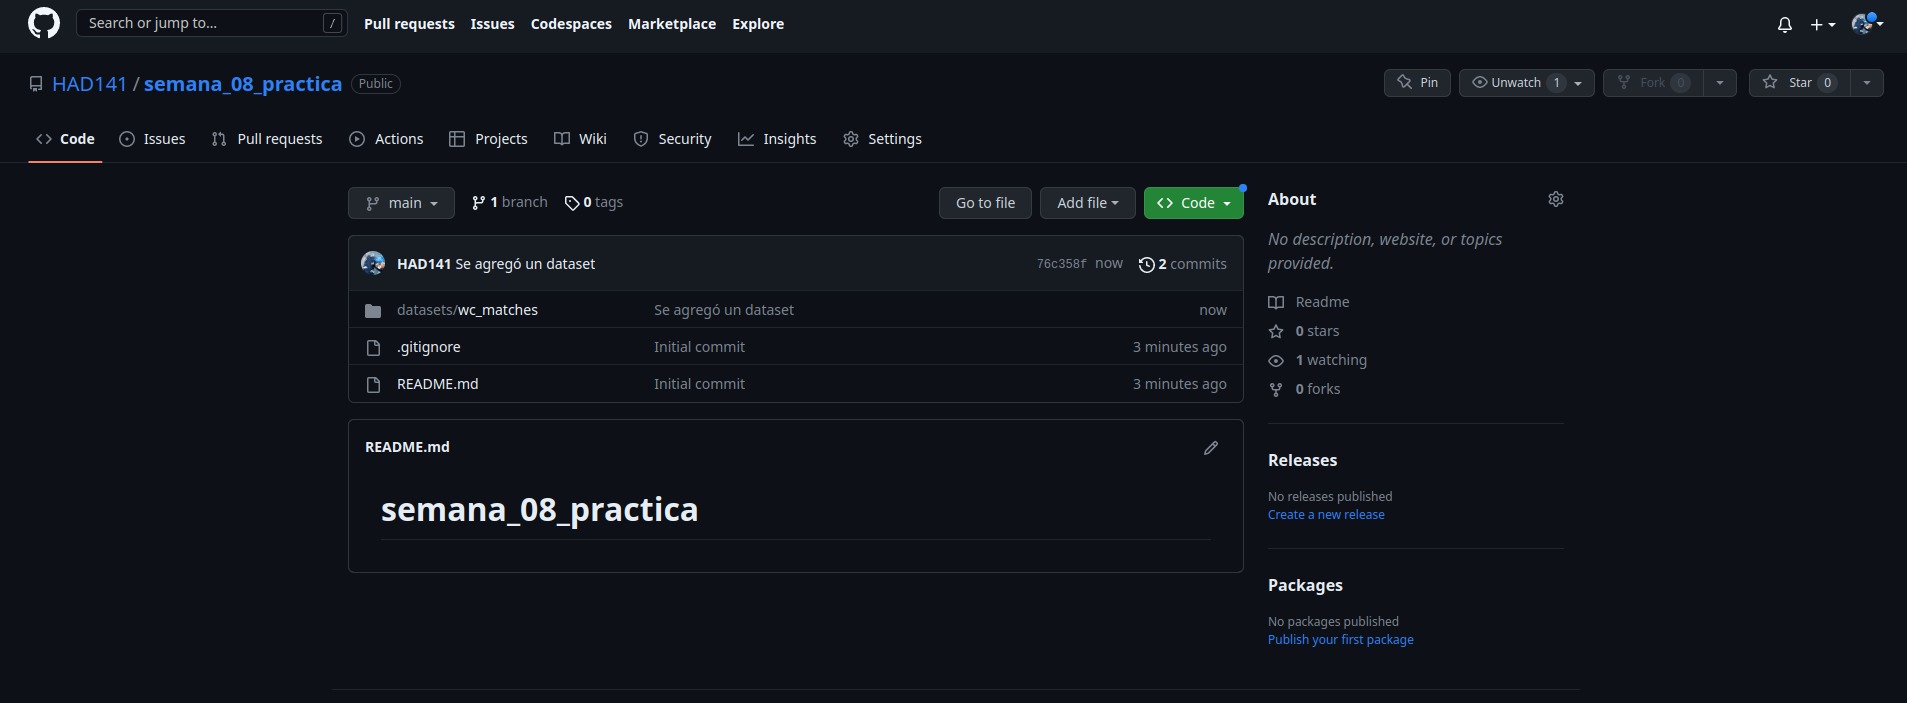

# Ejercicio 03

Obtener la mayor cantidad de goles en un partido que hizo cada selección. Mostrar El nombre del país de la selección y la cantidad de goles. Guardar la tabla en un archivo con extensión csv. El nombre del nuevo archivo debe ser
`goals.csv`.

Agregarlo al repositorio, realizar un commit y hacer un push al repositorio.

In [ ]:
# leemos el dataset y mostramos la cabecera
df_wc = read_csv(f"{file_name}")
df_wc.head()

# agrupo por team1 y agrego por score1 y obtengo el máximo
df_team1_goals = df_wc.groupby(["team1"]).aggregate("score1").max()
# agrupo por team2 y agrego por score2 y obtengo el máximo
df_team2_goals = df_wc.groupby(["team2"]).aggregate("score2").max()
# concateno ambas Series, voy a obtener índices repetidos (nombre de los países)
series_teams = pd.concat([df_team1_goals, df_team2_goals])
# transformo la Series en un DataFrame con las columnas "teams" y "goals"
df_teams_goals = DataFrame({"teams": series_teams.index, "goals": series_teams.values})
# agrupo por teams y agrego por golas y obtengo el máximo
df_teams_goals = df_teams_goals.groupby(["teams"]).aggregate("goals").max()
# guardo el archivo
df_teams_goals.to_csv(f"{folder_dataset}/goals.csv")

In [ ]:
# agrego el notebook
goal_csv = f"{folder_dataset}/goals.csv"
!git add {goal_csv}
# realizo el commit
!git commit -m "Se agregó el dataset de goles"
# subo los cambios
!git push origin main

[main 5fe758c] Se agregó el dataset de goles
 1 file changed, 33 insertions(+)
 create mode 100644 datasets/wc_matches/goals.csv
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (5/5), 625 bytes | 625.00 KiB/s, done.
Total 5 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/HAD141/semana_08_practica.git
   76c358f..5fe758c  main -> main


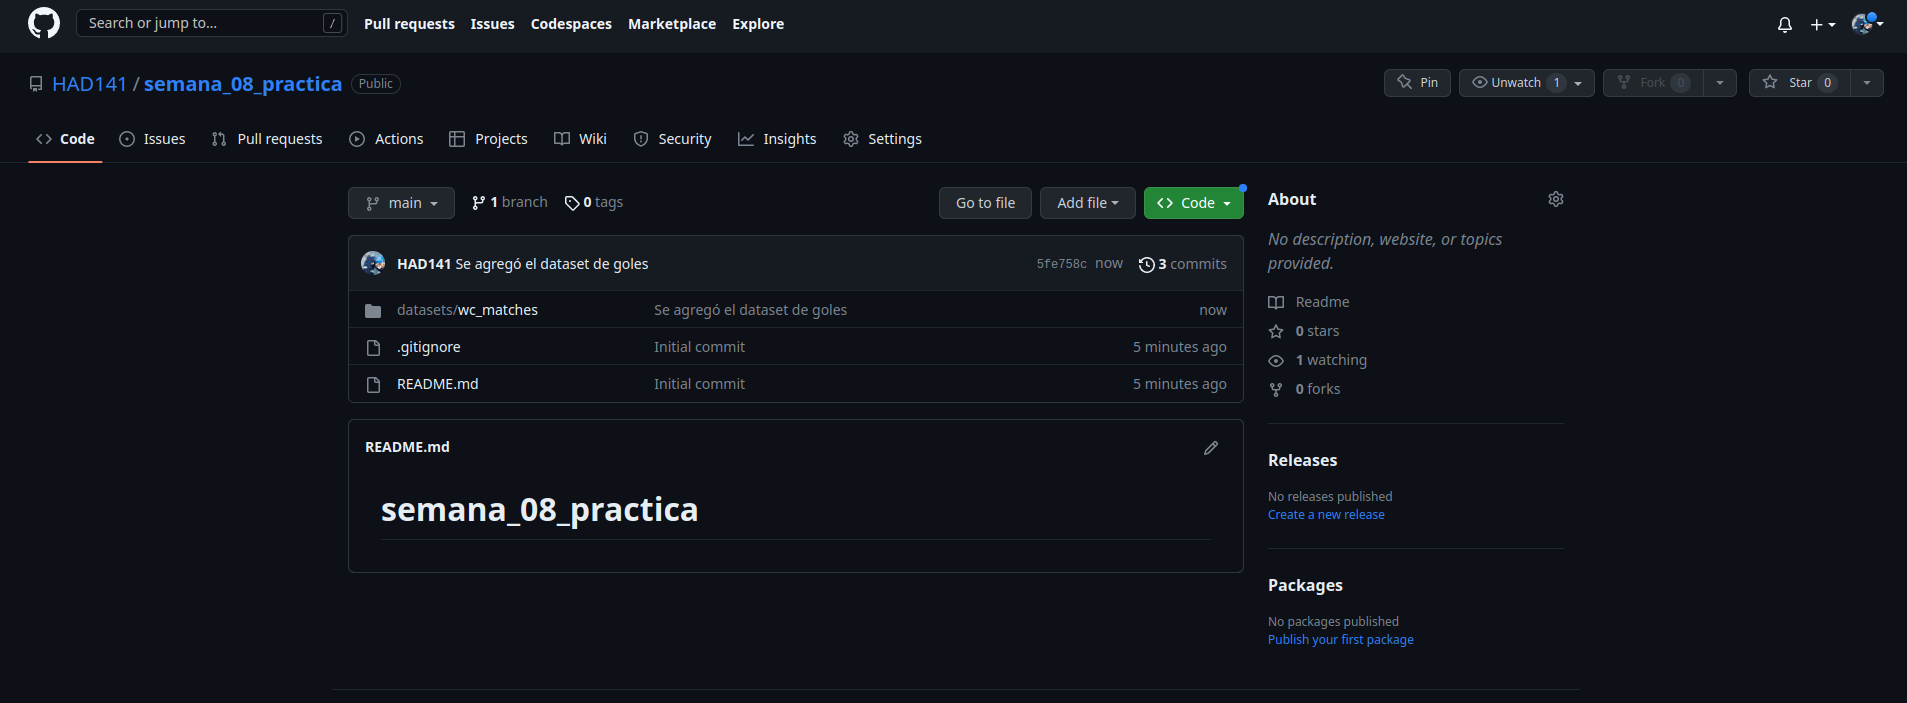

# Ejercicio 04

Graficar el DataFrame del ejercicio 03 como un gráfico de barras.

Agregarlo al repositorio, realizar un commit y hacer un push al repositorio.

[main 021b00e] Se el archivo de la figura
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 datasets/wc_matches/golas.jpg
Enumerating objects: 8, done.
Counting objects: 100% (8/8), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (5/5), 23.28 KiB | 953.00 KiB/s, done.
Total 5 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/HAD141/semana_08_practica.git
   5fe758c..021b00e  main -> main


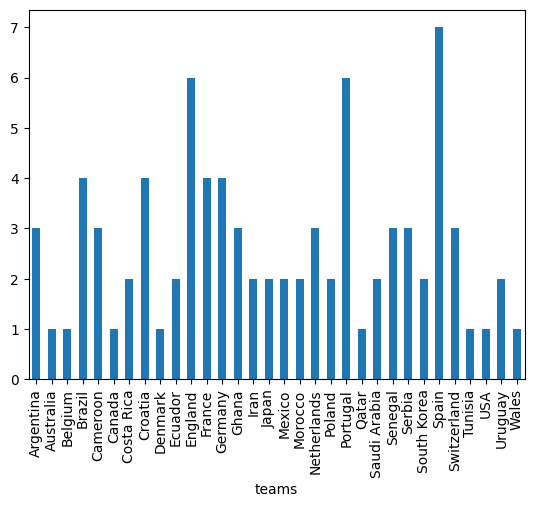

In [ ]:
figure_jpg = f"{folder_dataset}/golas.jpg"
# obtengo el objeto Figure
figure = df_teams_goals.plot(kind="bar").get_figure()
# guardo la fingura
figure.savefig(figure_jpg)

!git add {figure_jpg}
# realizo el commit
!git commit -m "Se el archivo de la figura"
# subo los cambios
!git push origin main

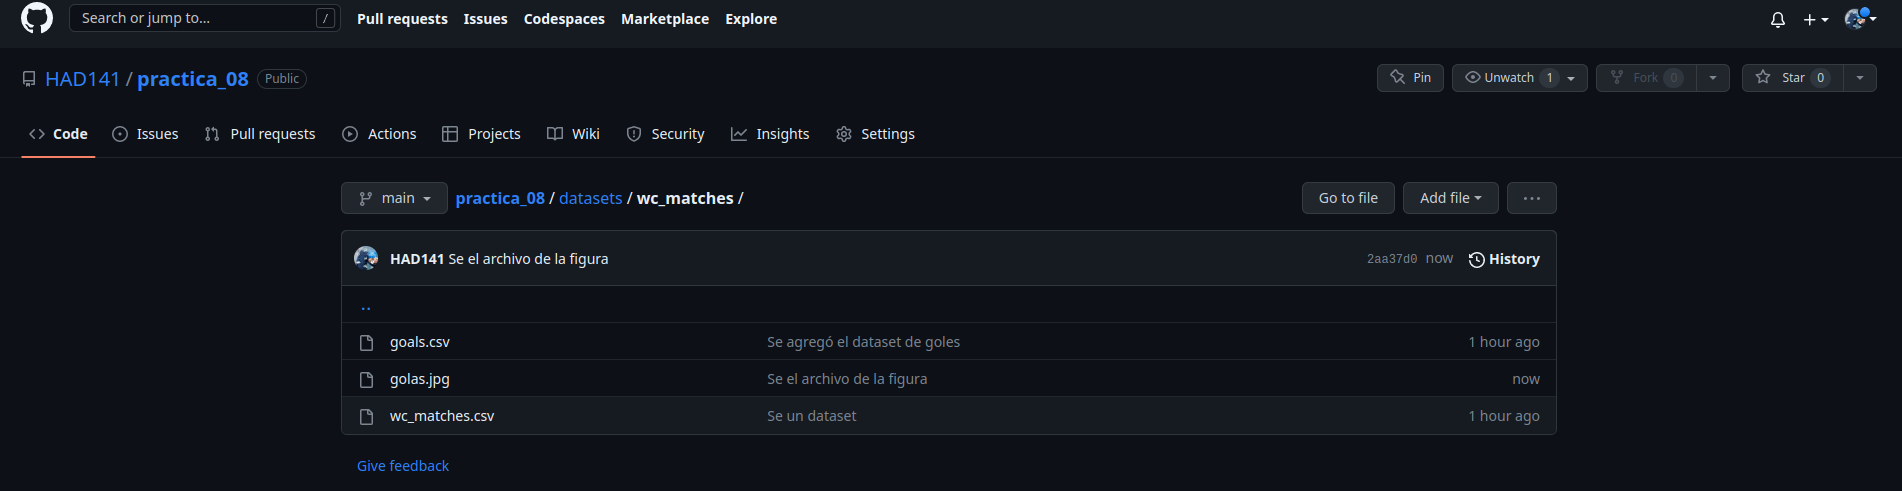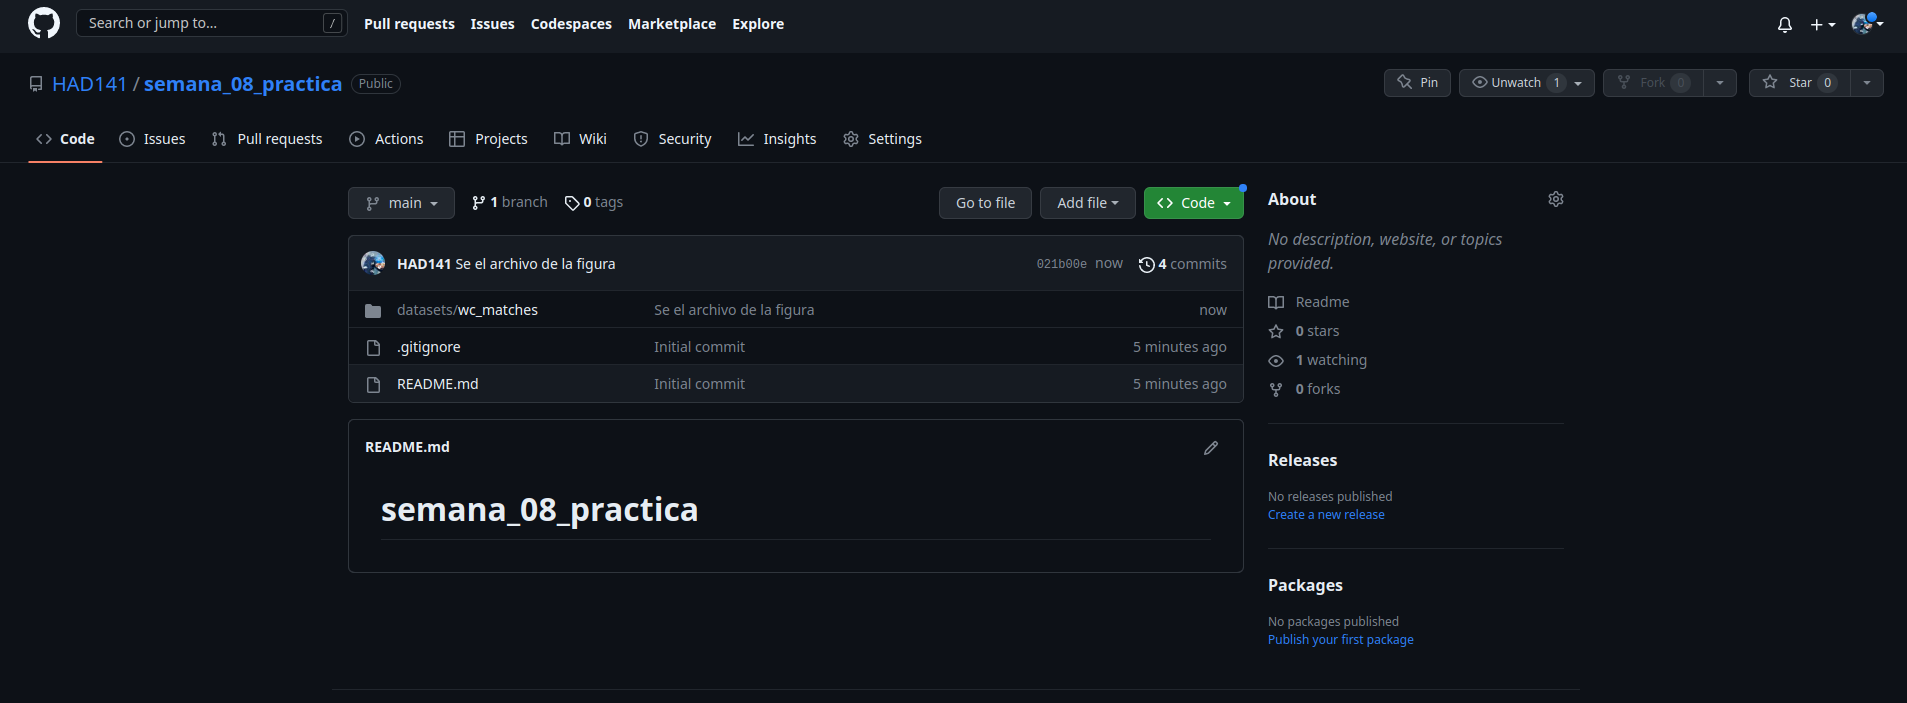

# Ejercicio 05

Crear un script llamado `funcion.py` con el siguiente contenido
```python
def imprimir():
  for i in range(10):
    print(str(i) + " = " + str(~i))
```

Importar el script y ejecutar la función

Agregarlo al repositorio, realizar un commit y hacer un push al repositorio.

In [ ]:
# creo el archivo
!echo "def imprimir():" >funcion.py
!echo "  for i in range(10):" >>funcion.py
!echo "    print(str(i) + \" = \" + str(~i))" >>funcion.py

!git add funcion.py
# realizo el commit
!git commit -m "Se el archivo funcion.py"
# subo los cambios
!git push origin main

[main 912f6da] Se el archivo funcion.py
 1 file changed, 3 insertions(+)
 create mode 100644 funcion.py
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 348 bytes | 348.00 KiB/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/HAD141/semana_08_practica.git
   021b00e..912f6da  main -> main


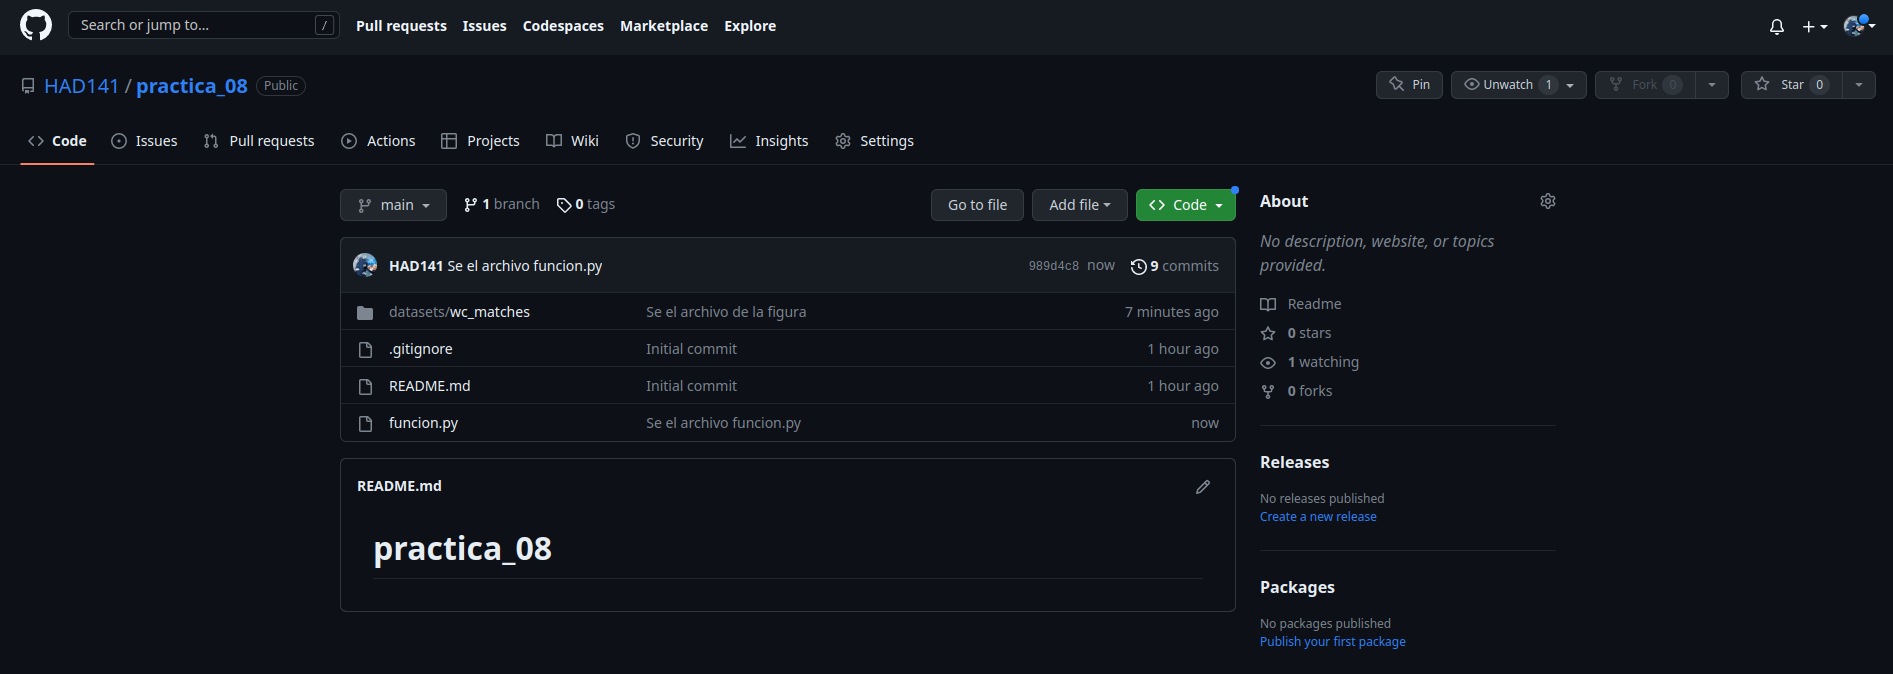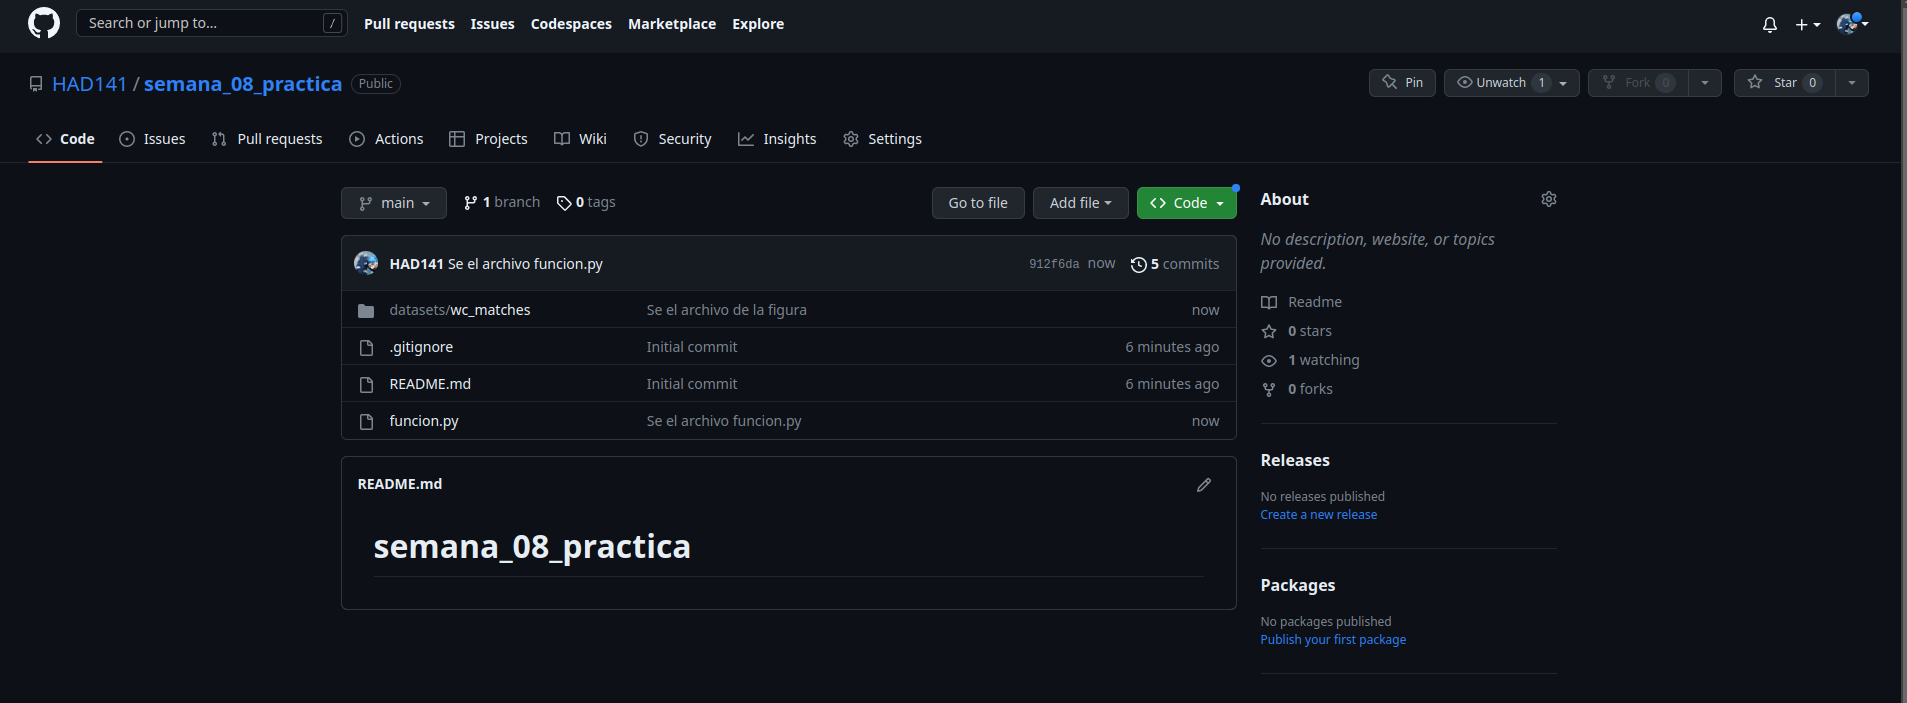

In [ ]:
# import el módulo de sistemas
import sys
# agrego a la lista de paths el path del repositorio
sys.path.append("/content/semana_08_practica")

In [ ]:
# incluyo el script de mi repositorio git que se llama funcion.py
from funcion import imprimir
# llamo a la función que cree
imprimir()

0 = -1
1 = -2
2 = -3
3 = -4
4 = -5
5 = -6
6 = -7
7 = -8
8 = -9
9 = -10
